In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
features=pd.read_csv("features.csv")
stores=pd.read_csv("stores.csv")

In [3]:
##checking how the data appears across all the datasets
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [5]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
##merging both the datasets train and test with stores and features respectively for further processing
train_init=pd.merge(train,stores,on=["Store"])
train_init

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315
...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221
421566,45,98,2012-10-05,628.10,False,B,118221
421567,45,98,2012-10-12,1061.02,False,B,118221
421568,45,98,2012-10-19,760.01,False,B,118221


In [8]:
##finalazing the merger with the features dataset
train_final=pd.merge(train_init,features,on=["Store","Date","IsHoliday"])
train_final

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,94,2012-10-26,5203.31,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,95,2012-10-26,56017.47,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,97,2012-10-26,6817.48,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


In [11]:
##merging for the test dataset just as we did with the training dataset  
test_init=pd.merge(test,stores)
test_init

,Store,Dept,Date,IsHoliday,Type,Size
0,1,1,2012-11-02,False,A,151315
1,1,1,2012-11-09,False,A,151315
2,1,1,2012-11-16,False,A,151315
3,1,1,2012-11-23,True,A,151315
4,1,1,2012-11-30,False,A,151315
...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,B,118221
115060,45,98,2013-07-05,False,B,118221
115061,45,98,2013-07-12,False,B,118221
115062,45,98,2013-07-19,False,B,118221


In [13]:
##merging the test_inint dataset with features dataset with joins on (Store,Dat,Isholiday)
test_final=pd.merge(test_init,features,on=["Store","Date","IsHoliday"])
test_final

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,93,2013-07-26,False,B,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
115060,45,94,2013-07-26,False,B,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
115061,45,95,2013-07-26,False,B,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
115062,45,97,2013-07-26,False,B,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


In [18]:
##making audit report for both train and test data including numerical and categorical data set
#defining function for audit report for both numerical and catergorical data
def num_audit(x):
    return pd.Series([x.count(),x.isnull().sum(),x.max(),x.min(),x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),
                     x.quantile(0.50),x.quantile(0.75),x.quantile(0.90),x.quantile(0.95)],
                    index=["NCount","Null","Max","Min","P05","P10","P25","P50","P75","P90","P95"])

In [21]:
##audit for numerical train data
train_final.select_dtypes(['int64','float64']).apply(lambda x:num_audit(x)).T

,NCount,Null,Max,Min,P05,P10,P25,P50,P75,P90,P95
Store,421570.0,0.0,45.000000,1.000,3.000000,5.000000,11.000000,22.00000,33.000000,40.000000,43.000000
Dept,421570.0,0.0,99.000000,1.000,4.000000,7.000000,18.000000,37.00000,74.000000,92.000000,95.000000
Weekly_Sales,421570.0,0.0,693099.360000,-4988.940,59.974500,291.097000,2079.650000,7612.03000,20205.852500,42845.673000,61201.951000
Size,421570.0,0.0,219622.000000,34875.000,39690.000000,39910.000000,93638.000000,140167.00000,202505.000000,204184.000000,206302.000000
Temperature,421570.0,0.0,100.140000,-2.060,27.310000,33.980000,46.680000,62.09000,74.280000,83.580000,87.270000
Fuel_Price,421570.0,0.0,4.468000,2.472,2.653000,2.720000,2.933000,3.45200,3.738000,3.917000,4.029000
MarkDown1,150681.0,270889.0,88646.760000,0.270,149.190000,375.200000,2240.270000,5347.45000,9210.900000,15282.470000,21801.350000
MarkDown2,111248.0,310322.0,104519.540000,-265.760,1.950000,6.980000,41.600000,192.00000,1926.940000,8549.740000,16497.470000
MarkDown3,137091.0,284479.0,141630.610000,-29.100,0.650000,1.650000,5.080000,24.60000,103.990000,400.090000,1059.900000
MarkDown4,134967.0,286603.0,67474.850000,0.220,28.760000,108.710000,504.220000,1481.31000,3595.040000,7871.420000,12645.960000


In [36]:
##audit report for categorical data
def cat_audit(x):
    return pd.Series([x.count(),x.isnull().sum()],
                    index=['NCount','Null'])

In [38]:
train_final.select_dtypes(["object"]).apply(lambda x:cat_audit(x)).T

,NCount,Null
Date,421570,0
Type,421570,0


In [40]:
##auditing for test data as well
test_final.select_dtypes(["int64","float64"]).apply(lambda x:num_audit(x)).T

,NCount,Null,Max,Min,P05,P10,P25,P50,P75,P90,P95
Store,115064.0,0.0,45.000000,1.000000,3.0000,5.000000,11.000000,22.000000,33.000000,40.000000,43.000000
Dept,115064.0,0.0,99.000000,1.000000,4.0000,7.000000,18.000000,37.000000,74.000000,92.000000,95.000000
Size,115064.0,0.0,219622.000000,34875.000000,39690.0000,39910.000000,93638.000000,140167.000000,202505.000000,204184.000000,206302.000000
Temperature,115064.0,0.0,101.950000,-7.290000,23.9800,29.970000,39.820000,54.470000,67.350000,79.480000,83.820000
Fuel_Price,115064.0,0.0,4.125000,2.872000,3.1610,3.227000,3.431000,3.606000,3.766000,3.866000,3.951000
MarkDown1,114915.0,149.0,103184.980000,-2781.450000,189.4900,457.660000,1966.460000,4842.290000,9439.140000,15325.040000,23140.880000
MarkDown2,86437.0,28627.0,71074.170000,-35.740000,6.1400,25.770000,180.350000,742.590000,2735.670000,9277.290000,22671.670000
MarkDown3,105235.0,9829.0,149483.310000,-179.260000,1.1800,3.100000,15.100000,78.260000,272.580000,698.930000,2361.570000
MarkDown4,102176.0,12888.0,65344.640000,0.220000,16.9600,37.360000,155.460000,840.940000,3096.920000,7674.410000,14191.010000
MarkDown5,115064.0,0.0,771448.100000,-185.170000,540.8900,770.883000,1309.300000,2390.430000,4227.270000,6966.340000,9316.710000


In [41]:
##categorical auditing
test_final.select_dtypes(["object"]).apply(lambda x:cat_audit(x)).T

,NCount,Null
Date,115064,0
Type,115064,0


In [43]:
##checking for correlation in both train and test data set along with heatmap
train_corr=train_final.corr()
train_corr

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000,0.024004,-0.085195,-0.000548,-0.182881,-0.050097,0.065290,-0.119588,-0.035173,-0.031556,-0.009941,-0.026634,-0.211088,0.208552
Dept,0.024004,1.000000,0.148032,0.000916,-0.002966,0.004437,0.003572,-0.002426,0.000290,0.001784,0.004257,0.000109,-0.007477,0.007837
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,0.243828,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864
IsHoliday,-0.000548,0.000916,0.012774,1.000000,0.000593,-0.155949,-0.078281,-0.035586,0.334818,0.427960,-0.000562,-0.053719,-0.001944,0.010460
Size,-0.182881,-0.002966,0.243828,0.000593,1.000000,-0.058313,0.003361,0.345673,0.108827,0.048913,0.168196,0.304575,-0.003314,-0.068238
Temperature,-0.050097,0.004437,-0.002312,-0.155949,-0.058313,1.000000,0.143859,-0.040594,-0.323927,-0.096880,-0.063947,-0.017544,0.182112,0.096730
Fuel_Price,0.065290,0.003572,-0.000120,-0.078281,0.003361,0.143859,1.000000,0.061371,-0.220895,-0.102092,-0.044986,-0.128065,-0.164210,-0.033853
MarkDown1,-0.119588,-0.002426,0.085251,-0.035586,0.345673,-0.040594,0.061371,1.000000,0.024486,-0.108115,0.819238,0.160257,-0.055558,0.050285
MarkDown2,-0.035173,0.000290,0.024130,0.334818,0.108827,-0.323927,-0.220895,0.024486,1.000000,-0.050108,-0.007768,-0.007440,-0.039534,0.020940
MarkDown3,-0.031556,0.001784,0.060385,0.427960,0.048913,-0.096880,-0.102092,-0.108115,-0.050108,1.000000,-0.071095,-0.026467,-0.023590,0.012818


In [45]:
##test correlation
test_corr=test_final.corr()
test_corr

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000,0.019627,-0.001166,-0.186845,-0.043495,0.153425,-0.091707,-0.041370,-0.025177,0.010331,0.010419,-0.214872,0.250321
Dept,0.019627,1.000000,0.001249,0.001502,0.003970,0.000554,-0.002353,0.001292,0.000247,0.002510,0.000776,-0.006336,0.004087
IsHoliday,-0.001166,0.001249,1.000000,-0.000443,-0.187428,-0.126443,0.355257,0.265402,0.496062,0.289700,-0.019386,-0.001475,0.010288
Size,-0.186845,0.001502,-0.000443,1.000000,-0.061256,0.055088,0.309614,0.157526,0.050088,0.155448,0.103681,-0.002916,-0.001988
Temperature,-0.043495,0.003970,-0.187428,-0.061256,1.000000,0.073938,-0.168899,-0.324280,-0.049771,-0.059583,0.003937,0.280861,0.022136
Fuel_Price,0.153425,0.000554,-0.126443,0.055088,0.073938,1.000000,0.083320,-0.161963,-0.005827,0.034199,0.012722,-0.465721,0.417126
MarkDown1,-0.091707,-0.002353,0.355257,0.309614,-0.168899,0.083320,1.000000,0.001777,-0.090085,0.804449,0.061714,-0.028729,0.019241
MarkDown2,-0.041370,0.001292,0.265402,0.157526,-0.324280,-0.161963,0.001777,1.000000,-0.063757,-0.101784,-0.014159,-0.059350,-0.000547
MarkDown3,-0.025177,0.000247,0.496062,0.050088,-0.049771,-0.005827,-0.090085,-0.063757,1.000000,-0.059576,-0.015305,-0.022021,0.006298
MarkDown4,0.010331,0.002510,0.289700,0.155448,-0.059583,0.034199,0.804449,-0.101784,-0.059576,1.000000,0.024163,-0.056629,0.021993


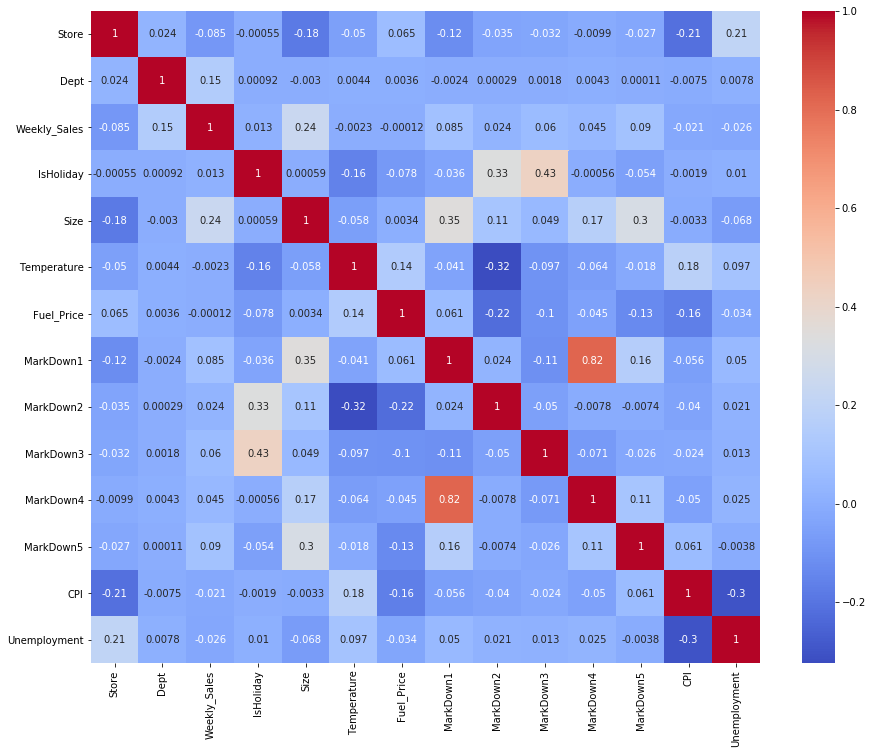

In [47]:
##using the heatmap to check for the correlation among the variables
import seaborn as sns
plt.figure(figsize=(15,12))
sns.heatmap(train_corr,annot=True,cmap="coolwarm")

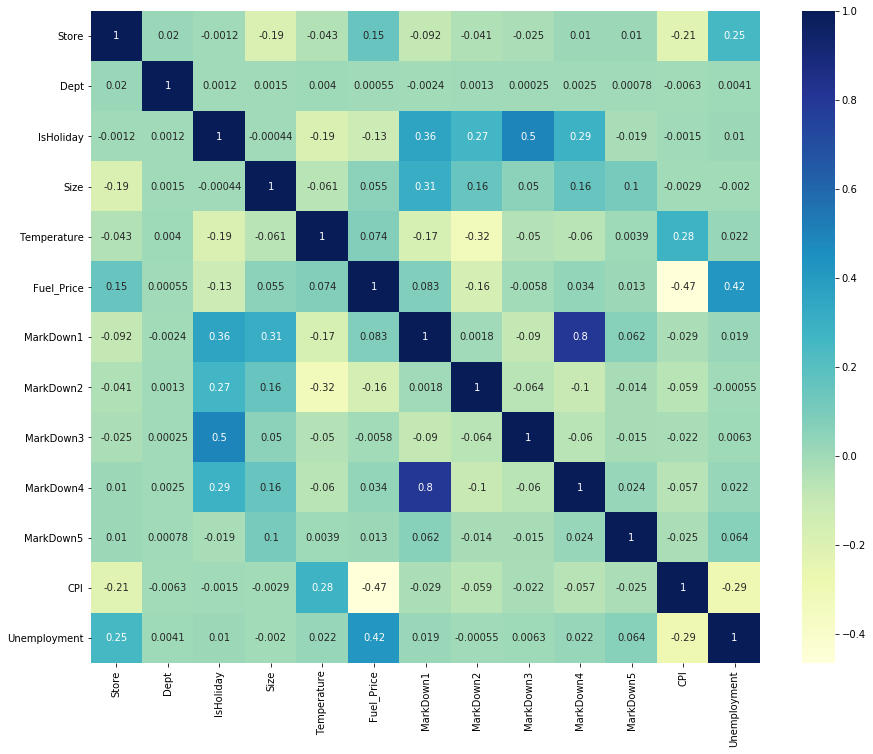

In [48]:
plt.figure(figsize=(15,12))
sns.heatmap(test_corr,annot=True,cmap='YlGnBu')

# Exploratory Analysis

In [49]:
##since weekly sales is our target column we need to check how it relates with other given variables
train_final

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,94,2012-10-26,5203.31,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,95,2012-10-26,56017.47,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,97,2012-10-26,6817.48,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


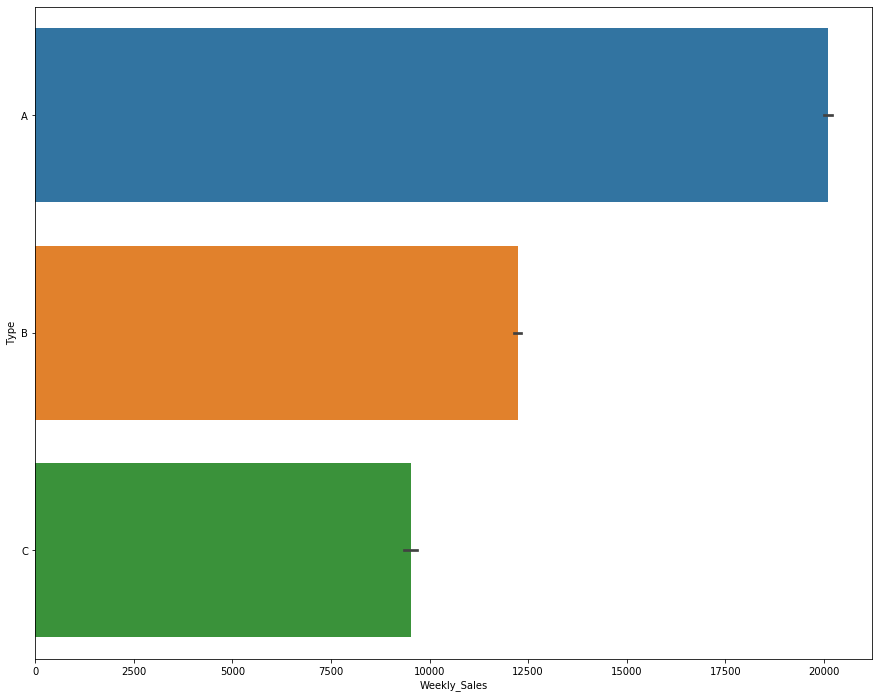

In [51]:
plt.figure(figsize=(15,12))
sns.barplot(x=train_final.Weekly_Sales,y=train_final.Type)
plt.show()

# its clear from the above graph that Store Type A has the highest sales number compared to other sales type

<Figure size 1800x1440 with 0 Axes>

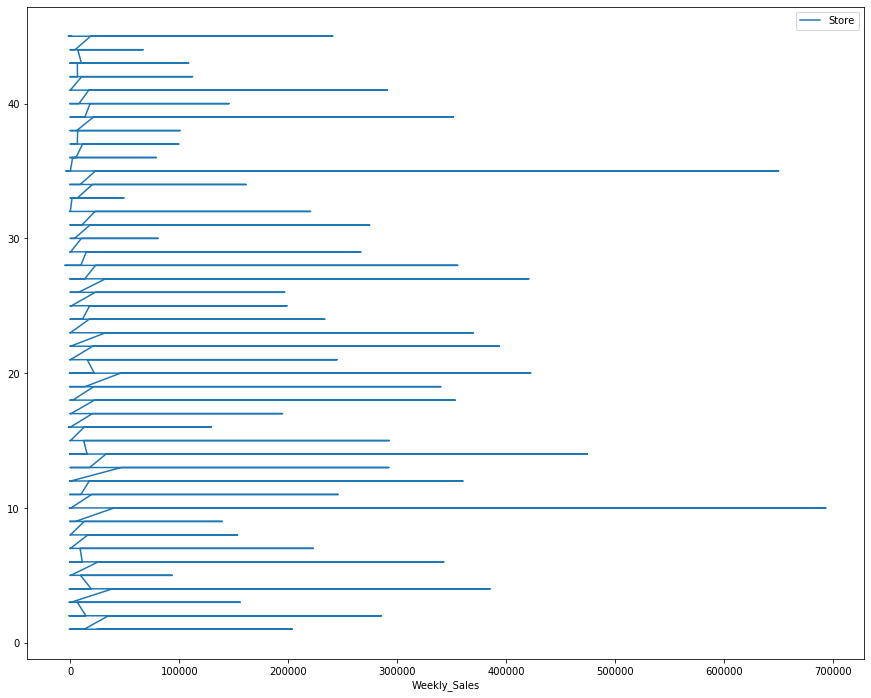

In [62]:
##weekly sales vs Store
train_final.Store.value_counts()
train_final.plot(kind="line",x="Weekly_Sales",y="Store",alpha=1,figsize=(15,12))
plt.show()

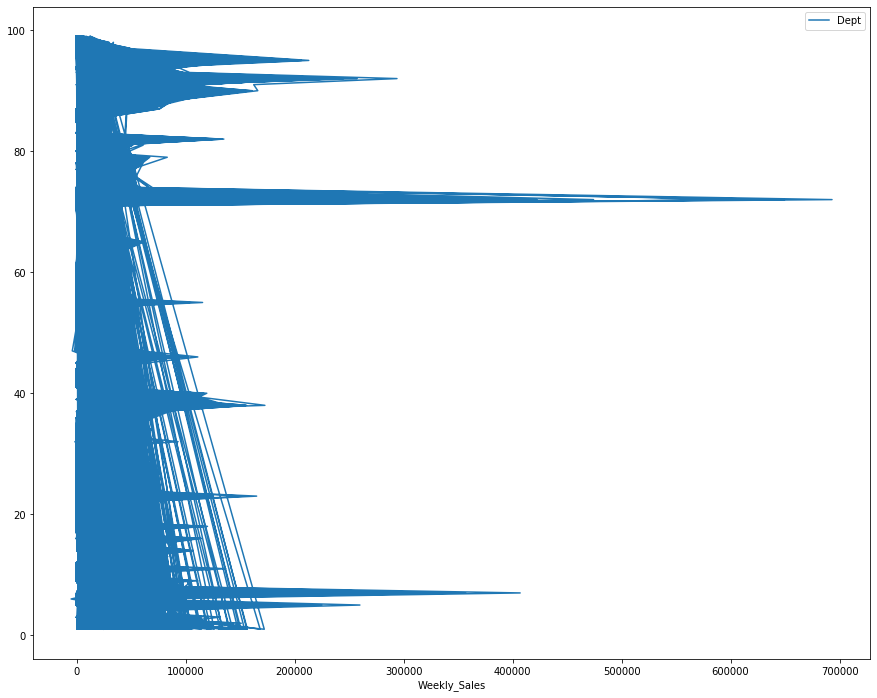

In [66]:
##weekly sales vs Dept
train_final.plot(kind="line",x="Weekly_Sales",y="Dept",figsize=(15,12))

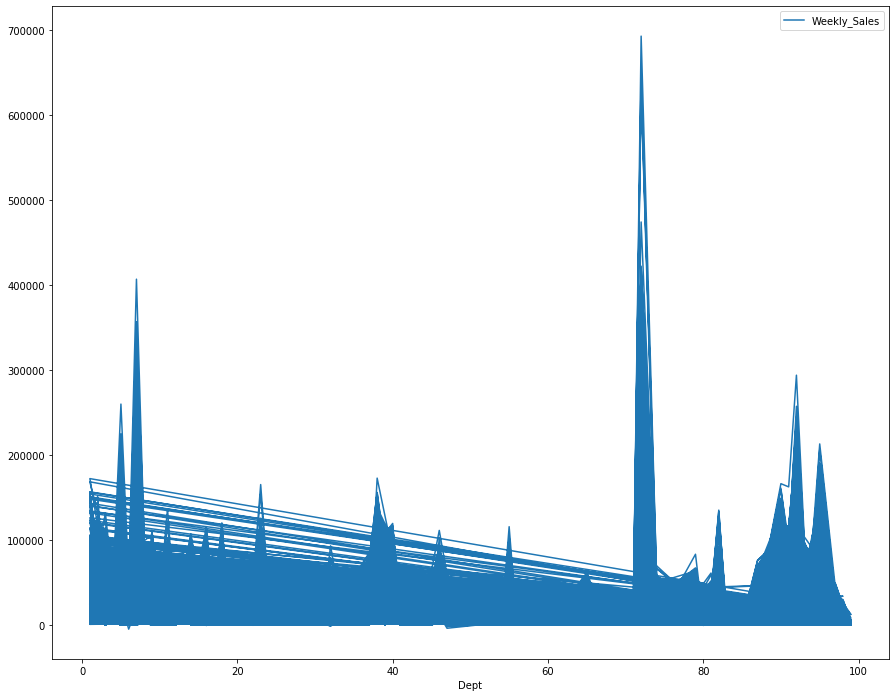

In [67]:
##orr we can also do it in a more interesting way by reversing the axis
train_final.plot(kind="line",x="Dept",y="Weekly_Sales",figsize=(15,12))

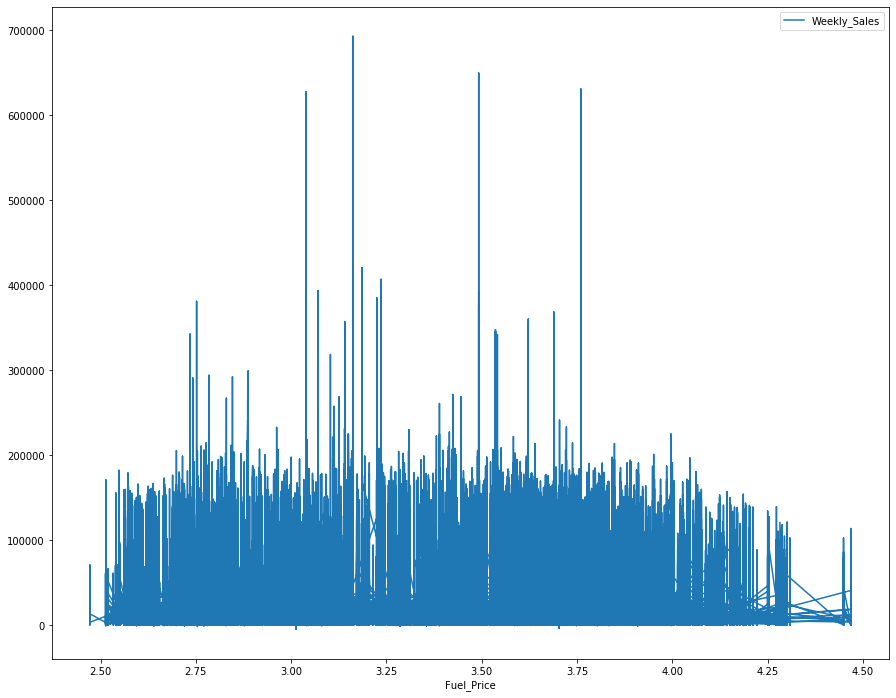

In [69]:
 train_final.plot(kind="line",x="Fuel_Price",y="Weekly_Sales",figsize=(15,12))

#  missing value and its treatment

In [72]:
train_final.isnull().sum().sort_values(ascending=False)

MarkDown2       310322
MarkDown4       286603
MarkDown3       284479
MarkDown1       270889
MarkDown5       270138
Unemployment         0
CPI                  0
Fuel_Price           0
Temperature          0
Size                 0
Type                 0
IsHoliday            0
Weekly_Sales         0
Date                 0
Dept                 0
Store                0
dtype: int64

In [75]:
##replacing the missing values in train_final dataset with 0
train_final=train_final.apply(lambda x: x.fillna(0))

NameError: name 'tran_final' is not defined

In [76]:
train_final.isnull().sum().sort_values(ascending=False)

Unemployment    0
CPI             0
MarkDown5       0
MarkDown4       0
MarkDown3       0
MarkDown2       0
MarkDown1       0
Fuel_Price      0
Temperature     0
Size            0
Type            0
IsHoliday       0
Weekly_Sales    0
Date            0
Dept            0
Store           0
dtype: int64

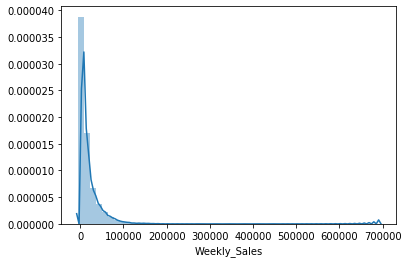

In [78]:
sns.distplot(train_final.Weekly_Sales)

In [80]:
##we do not see a normal distribution for the target variable hence we will apply a log tanformation to make it normaly dstributed
np.log(train_final.Weekly_Sales)

C:\Users\sharm\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\sharm\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0         10.123607
1         10.831811
2          9.528075
3         10.595485
4         10.380634
            ...    
421565     7.819154
421566     8.557050
421567    10.933419
421568     8.827245
421569     6.981749
Name: Weekly_Sales, Length: 421570, dtype: float64

In [82]:
train_final["ln_weekly_sales"]=np.log(train_final.Weekly_Sales)

C:\Users\sharm\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\sharm\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [98]:
##outlier treatment
def out_treat(x):
    x=x.clip(lower=x.quantile(0.05),upper=x.quantile(0.95))
    return x

In [103]:
train_conti=train_conti.apply(lambda x:out_treat(x))

In [102]:
train_conti=train_final.select_dtypes(["int64",'float64'])
train_cat=train_final.select_dtypes("object")

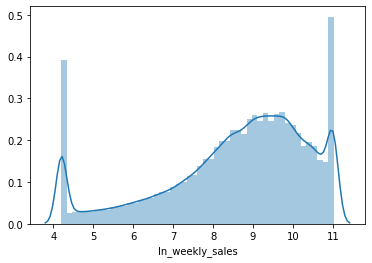

In [104]:
sns.distplot(train_conti.ln_weekly_sales)

In [188]:
def out_99(x):
    x=x.clip(lower=x.quantile(0.01),upper=x.quantile(0.99))
    return x

In [189]:
train_demo=train_final.select_dtypes(["int64","float64"]).apply(lambda x:out_99(x))

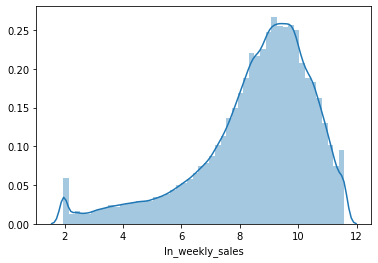

In [190]:
sns.distplot(train_demo.ln_weekly_sales)

In [114]:
##here we can see that the log transformation of the target variable is closer to normal distribution as compared to weekly sales hence we will be using this for modeling
train_final.dtypes

Store                int64
Dept                 int64
Date                object
Weekly_Sales         int64
IsHoliday             bool
Type                object
Size                 int64
Temperature        float64
Fuel_Price         float64
MarkDown1          float64
MarkDown2          float64
MarkDown3          float64
MarkDown4          float64
MarkDown5          float64
CPI                float64
Unemployment       float64
ln_weekly_sales    float64
dtype: object

## Feature Extraction

In [120]:
##converting "Isholiday" feature to numerical while selecting True=1 and False=0
train_final.IsHoliday=np.where(train_final.IsHoliday==True,1,0)
train_final.IsHoliday

0         0
1         0
2         0
3         0
4         0
         ..
421565    0
421566    0
421567    0
421568    0
421569    0
Name: IsHoliday, Length: 421570, dtype: int32

In [122]:
train_final.IsHoliday.value_counts()

0    391909
1     29661
Name: IsHoliday, dtype: int64

In [124]:
train_final.Date.dtype

dtype('O')

In [125]:
##converting the date column to Date type
train_final.Date=pd.to_datetime(train_final.Date)

In [133]:
from datetime import datetime

In [147]:
##extracting date features and creating new columns in the train_final dataset
train_final["day_of_week"]=train_final.Date.dt.dayofweek
train_final["day"]=train_final.Date.dt.day
train_final["month"]=train_final.Date.dt.month
train_final["year"]=train_final.Date.dt.year

In [148]:
train_final

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,ln_weekly_sales,day_of_week,day,month,year
0,1,1,2010-02-05,24924,0,A,151315,42.31,2.572,0.00,...,0.0,0.00,0.00,211.096358,8.106,10.12,4,5,2,2010
1,1,2,2010-02-05,50605,0,A,151315,42.31,2.572,0.00,...,0.0,0.00,0.00,211.096358,8.106,10.83,4,5,2,2010
2,1,3,2010-02-05,13740,0,A,151315,42.31,2.572,0.00,...,0.0,0.00,0.00,211.096358,8.106,9.53,4,5,2,2010
3,1,4,2010-02-05,39954,0,A,151315,42.31,2.572,0.00,...,0.0,0.00,0.00,211.096358,8.106,10.60,4,5,2,2010
4,1,5,2010-02-05,32229,0,A,151315,42.31,2.572,0.00,...,0.0,0.00,0.00,211.096358,8.106,10.38,4,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487,0,B,118221,58.85,3.882,4018.91,...,100.0,211.94,858.33,192.308899,8.667,7.82,4,26,10,2012
421566,45,94,2012-10-26,5203,0,B,118221,58.85,3.882,4018.91,...,100.0,211.94,858.33,192.308899,8.667,8.56,4,26,10,2012
421567,45,95,2012-10-26,56017,0,B,118221,58.85,3.882,4018.91,...,100.0,211.94,858.33,192.308899,8.667,10.93,4,26,10,2012
421568,45,97,2012-10-26,6817,0,B,118221,58.85,3.882,4018.91,...,100.0,211.94,858.33,192.308899,8.667,8.83,4,26,10,2012


In [151]:
train_final['Super_Bowl'] = np.where((train_final['Date']==datetime(2010, 2, 12)) | (train_final['Date']==datetime(2011, 2, 11)) | (train_final['Date']==datetime(2012, 2, 10)) | (train_final['Date']==datetime(2013, 2, 8)),1,0)
train_final['labor_day']=np.where((train_final['Date']==datetime(2010, 9 ,10)) | (train_final["Date"]==datetime(2011, 9 ,9)) | (train_final["Date"]==datetime(2012, 9,7)) | (train_final["Date"]==datetime(2013,9,6)),1,0)
train_final["Thanksgiving"]=np.where((train_final["Date"]==datetime(2010,11,26))| (train_final["Date"]==datetime(2011,11,25)) | (train_final["Date"]==datetime(2012,11,23))| (train_final["Date"]==datetime(2013,11,29)),1,0)
train_final["Christmas"]=np.where((train_final["Date"]==datetime(2010,12,31)) | (train_final["Date"]==datetime(2011,12,30)) | (train_final["Date"]==datetime(2012,12,28))| (train_final["Date"]==datetime(2013,12,27)),1,0)

In [152]:
train_final

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,Unemployment,ln_weekly_sales,day_of_week,day,month,year,Super_Bowl,labor_day,Thanksgiving,Christmas
0,1,1,2010-02-05,24924,0,A,151315,42.31,2.572,0.00,...,8.106,10.12,4,5,2,2010,0,0,0,0
1,1,2,2010-02-05,50605,0,A,151315,42.31,2.572,0.00,...,8.106,10.83,4,5,2,2010,0,0,0,0
2,1,3,2010-02-05,13740,0,A,151315,42.31,2.572,0.00,...,8.106,9.53,4,5,2,2010,0,0,0,0
3,1,4,2010-02-05,39954,0,A,151315,42.31,2.572,0.00,...,8.106,10.60,4,5,2,2010,0,0,0,0
4,1,5,2010-02-05,32229,0,A,151315,42.31,2.572,0.00,...,8.106,10.38,4,5,2,2010,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487,0,B,118221,58.85,3.882,4018.91,...,8.667,7.82,4,26,10,2012,0,0,0,0
421566,45,94,2012-10-26,5203,0,B,118221,58.85,3.882,4018.91,...,8.667,8.56,4,26,10,2012,0,0,0,0
421567,45,95,2012-10-26,56017,0,B,118221,58.85,3.882,4018.91,...,8.667,10.93,4,26,10,2012,0,0,0,0
421568,45,97,2012-10-26,6817,0,B,118221,58.85,3.882,4018.91,...,8.667,8.83,4,26,10,2012,0,0,0,0


In [157]:
##randomly checking the value counts of the newly created holidays
print (train_final.Thanksgiving.value_counts())
print(train_final.Christmas.value_counts())

0    415611
1      5959
Name: Thanksgiving, dtype: int64
0    415624
1      5946
Name: Christmas, dtype: int64


In [159]:
train_final.dtypes

Store                       int64
Dept                        int64
Date               datetime64[ns]
Weekly_Sales                int64
IsHoliday                   int32
Type                       object
Size                        int64
Temperature               float64
Fuel_Price                float64
MarkDown1                 float64
MarkDown2                 float64
MarkDown3                 float64
MarkDown4                 float64
MarkDown5                 float64
CPI                       float64
Unemployment              float64
ln_weekly_sales           float64
day_of_week                 int64
day                         int64
month                       int64
year                        int64
Super_Bowl                  int32
labor_day                   int32
Thanksgiving                int32
Christmas                   int32
dtype: object

In [161]:
train_cat=train_cat.drop(columns=["Date"])
train_cat

,Type
0,A
1,A
2,A
3,A
4,A
...,...
421565,B
421566,B
421567,B
421568,B


In [162]:
##creating dummy variable for "Type" and later concatenating with the original dataset
dummy_vars=pd.get_dummies(train_cat,drop_first=True)
dummy_vars

,Type_B,Type_C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
421565,1,0
421566,1,0
421567,1,0
421568,1,0


In [163]:
train_final=train_final.drop(columns=['Date','Type'])
train_final

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Unemployment,ln_weekly_sales,day_of_week,day,month,year,Super_Bowl,labor_day,Thanksgiving,Christmas
0,1,1,24924,0,151315,42.31,2.572,0.00,0.00,0.0,...,8.106,10.12,4,5,2,2010,0,0,0,0
1,1,2,50605,0,151315,42.31,2.572,0.00,0.00,0.0,...,8.106,10.83,4,5,2,2010,0,0,0,0
2,1,3,13740,0,151315,42.31,2.572,0.00,0.00,0.0,...,8.106,9.53,4,5,2,2010,0,0,0,0
3,1,4,39954,0,151315,42.31,2.572,0.00,0.00,0.0,...,8.106,10.60,4,5,2,2010,0,0,0,0
4,1,5,32229,0,151315,42.31,2.572,0.00,0.00,0.0,...,8.106,10.38,4,5,2,2010,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2487,0,118221,58.85,3.882,4018.91,58.08,100.0,...,8.667,7.82,4,26,10,2012,0,0,0,0
421566,45,94,5203,0,118221,58.85,3.882,4018.91,58.08,100.0,...,8.667,8.56,4,26,10,2012,0,0,0,0
421567,45,95,56017,0,118221,58.85,3.882,4018.91,58.08,100.0,...,8.667,10.93,4,26,10,2012,0,0,0,0
421568,45,97,6817,0,118221,58.85,3.882,4018.91,58.08,100.0,...,8.667,8.83,4,26,10,2012,0,0,0,0


In [164]:
train_final=pd.concat([train_final,dummy_vars],axis=1)
train_final

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,day_of_week,day,month,year,Super_Bowl,labor_day,Thanksgiving,Christmas,Type_B,Type_C
0,1,1,24924,0,151315,42.31,2.572,0.00,0.00,0.0,...,4,5,2,2010,0,0,0,0,0,0
1,1,2,50605,0,151315,42.31,2.572,0.00,0.00,0.0,...,4,5,2,2010,0,0,0,0,0,0
2,1,3,13740,0,151315,42.31,2.572,0.00,0.00,0.0,...,4,5,2,2010,0,0,0,0,0,0
3,1,4,39954,0,151315,42.31,2.572,0.00,0.00,0.0,...,4,5,2,2010,0,0,0,0,0,0
4,1,5,32229,0,151315,42.31,2.572,0.00,0.00,0.0,...,4,5,2,2010,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2487,0,118221,58.85,3.882,4018.91,58.08,100.0,...,4,26,10,2012,0,0,0,0,1,0
421566,45,94,5203,0,118221,58.85,3.882,4018.91,58.08,100.0,...,4,26,10,2012,0,0,0,0,1,0
421567,45,95,56017,0,118221,58.85,3.882,4018.91,58.08,100.0,...,4,26,10,2012,0,0,0,0,1,0
421568,45,97,6817,0,118221,58.85,3.882,4018.91,58.08,100.0,...,4,26,10,2012,0,0,0,0,1,0


In [171]:
train_final['IsHoliday']=train_final['IsHoliday']| train_final["Super_Bowl"]| train_final["labor_day"]| train_final["Thanksgiving"]| train_final["Christmas"]


In [172]:
train_final.IsHoliday.value_counts()

0    391909
1     29661
Name: IsHoliday, dtype: int64

In [173]:
train_final.Christmas.value_counts()

0    415624
1      5946
Name: Christmas, dtype: int64

In [174]:
##removing the holidays variable since we have already imputed the holidays with the 'IsHoliday' variable
train_final=train_final.drop(columns=["Super_Bowl","labor_day","Thanksgiving","Christmas"])
train_final

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,ln_weekly_sales,day_of_week,day,month,year,Type_B,Type_C
0,1,1,24924,0,151315,42.31,2.572,0.00,0.00,0.0,...,0.00,211.096358,8.106,10.12,4,5,2,2010,0,0
1,1,2,50605,0,151315,42.31,2.572,0.00,0.00,0.0,...,0.00,211.096358,8.106,10.83,4,5,2,2010,0,0
2,1,3,13740,0,151315,42.31,2.572,0.00,0.00,0.0,...,0.00,211.096358,8.106,9.53,4,5,2,2010,0,0
3,1,4,39954,0,151315,42.31,2.572,0.00,0.00,0.0,...,0.00,211.096358,8.106,10.60,4,5,2,2010,0,0
4,1,5,32229,0,151315,42.31,2.572,0.00,0.00,0.0,...,0.00,211.096358,8.106,10.38,4,5,2,2010,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2487,0,118221,58.85,3.882,4018.91,58.08,100.0,...,858.33,192.308899,8.667,7.82,4,26,10,2012,1,0
421566,45,94,5203,0,118221,58.85,3.882,4018.91,58.08,100.0,...,858.33,192.308899,8.667,8.56,4,26,10,2012,1,0
421567,45,95,56017,0,118221,58.85,3.882,4018.91,58.08,100.0,...,858.33,192.308899,8.667,10.93,4,26,10,2012,1,0
421568,45,97,6817,0,118221,58.85,3.882,4018.91,58.08,100.0,...,858.33,192.308899,8.667,8.83,4,26,10,2012,1,0


In [175]:
#3remoing weekly sales as we have the log tranformation of the target column, also we will be removing unemployment factor
train_final=train_final.drop(columns=["Weekly_Sales","Unemployment"])
train_final

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,ln_weekly_sales,day_of_week,day,month,year,Type_B,Type_C
0,1,1,0,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,10.12,4,5,2,2010,0,0
1,1,2,0,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,10.83,4,5,2,2010,0,0
2,1,3,0,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,9.53,4,5,2,2010,0,0
3,1,4,0,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,10.60,4,5,2,2010,0,0
4,1,5,0,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,10.38,4,5,2,2010,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,0,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,7.82,4,26,10,2012,1,0
421566,45,94,0,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.56,4,26,10,2012,1,0
421567,45,95,0,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,10.93,4,26,10,2012,1,0
421568,45,97,0,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.83,4,26,10,2012,1,0


In [177]:
##seperating the independent and dependent variables for further modeling
train_x=train_final[train_final.columns.difference(["ln_weekly_sales"])]
train_x

,CPI,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Store,Temperature,Type_B,Type_C,day,day_of_week,month,year
0,211.096358,1,2.572,0,0.00,0.00,0.0,0.00,0.00,151315,1,42.31,0,0,5,4,2,2010
1,211.096358,2,2.572,0,0.00,0.00,0.0,0.00,0.00,151315,1,42.31,0,0,5,4,2,2010
2,211.096358,3,2.572,0,0.00,0.00,0.0,0.00,0.00,151315,1,42.31,0,0,5,4,2,2010
3,211.096358,4,2.572,0,0.00,0.00,0.0,0.00,0.00,151315,1,42.31,0,0,5,4,2,2010
4,211.096358,5,2.572,0,0.00,0.00,0.0,0.00,0.00,151315,1,42.31,0,0,5,4,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,192.308899,93,3.882,0,4018.91,58.08,100.0,211.94,858.33,118221,45,58.85,1,0,26,4,10,2012
421566,192.308899,94,3.882,0,4018.91,58.08,100.0,211.94,858.33,118221,45,58.85,1,0,26,4,10,2012
421567,192.308899,95,3.882,0,4018.91,58.08,100.0,211.94,858.33,118221,45,58.85,1,0,26,4,10,2012
421568,192.308899,97,3.882,0,4018.91,58.08,100.0,211.94,858.33,118221,45,58.85,1,0,26,4,10,2012


In [178]:
train_y=train_final.ln_weekly_sales
train_y

0         10.12
1         10.83
2          9.53
3         10.60
4         10.38
          ...  
421565     7.82
421566     8.56
421567    10.93
421568     8.83
421569     6.98
Name: ln_weekly_sales, Length: 421570, dtype: float64

In [191]:
train_final=train_final.apply(lambda x:out_99(x))

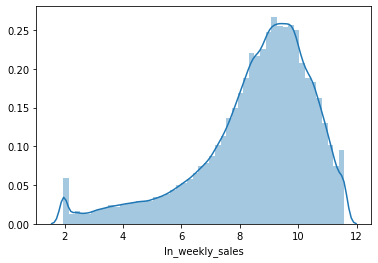

In [194]:
sns.distplot(train_final.ln_weekly_sales)

In [199]:
train_x=train_final[train_final.columns.difference(['ln_weekly_sales'])]
train_y=train_final.ln_weekly_sales

## Modeling 

In [209]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(train_x,train_y)

In [210]:
##for prediction we need test dataset which we have in test_final dataset
test_final

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,93,2013-07-26,False,B,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
115060,45,94,2013-07-26,False,B,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
115061,45,95,2013-07-26,False,B,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
115062,45,97,2013-07-26,False,B,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


In [212]:
test_final.Date=pd.to_datetime(test_final.Date)

In [213]:
test_final.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
IsHoliday                 bool
Type                    object
Size                     int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
dtype: object

In [214]:
test_final["day_of_week"]=test_final.Date.dt.dayofweek
test_final["day"]=test_final.Date.dt.day
test_final["month"]=test_final.Date.dt.month
test_final["year"]=test_final.Date.dt.year

In [215]:
##also creating the holidays columns in the test dataset
test_final['Super_Bowl'] = np.where((test_final['Date']==datetime(2010, 2, 12)) | (test_final['Date']==datetime(2011, 2, 11)) | (test_final['Date']==datetime(2012, 2, 10)) | (test_final['Date']==datetime(2013, 2, 8)),1,0)
test_final['labor_day']=np.where((test_final['Date']==datetime(2010, 9 ,10)) | (test_final["Date"]==datetime(2011, 9 ,9)) | (test_final["Date"]==datetime(2012, 9,7)) | (test_final["Date"]==datetime(2013,9,6)),1,0)
test_final["Thanksgiving"]=np.where((test_final["Date"]==datetime(2010,11,26))| (test_final["Date"]==datetime(2011,11,25)) | (test_final["Date"]==datetime(2012,11,23))| (test_final["Date"]==datetime(2013,11,29)),1,0)
test_final["Christmas"]=np.where((test_final["Date"]==datetime(2010,12,31)) | (test_final["Date"]==datetime(2011,12,30)) | (test_final["Date"]==datetime(2012,12,28))| (test_final["Date"]==datetime(2013,12,27)),1,0)

In [216]:
test_final.isnull().sum().sort_values(ascending=False)

Unemployment    38162
CPI             38162
MarkDown2       28627
MarkDown4       12888
MarkDown3        9829
MarkDown1         149
Dept                0
Date                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
Christmas           0
Thanksgiving        0
MarkDown5           0
day_of_week         0
day                 0
month               0
year                0
Super_Bowl          0
labor_day           0
Store               0
dtype: int64

In [226]:
##replacing unemployment and CPI null values with respectie means
test_final["Unemployment"]=test_final.Unemployment.fillna(test_final.Unemployment.mean())
test_final["CPI"]=test_final.CPI.fillna(test_final.CPI.mean())

In [227]:
test_final.isnull().sum().sort_values(ascending=False)

MarkDown2       28627
MarkDown4       12888
MarkDown3        9829
MarkDown1         149
Dept                0
Date                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
Christmas           0
Thanksgiving        0
MarkDown5           0
CPI                 0
Unemployment        0
day_of_week         0
day                 0
month               0
year                0
Super_Bowl          0
labor_day           0
Store               0
dtype: int64

In [228]:
##now replacing the markdown null values with 0
test_final=test_final.fillna(0)
test_final.isnull().sum().sort_values(ascending=False)

Christmas       0
MarkDown3       0
Dept            0
Date            0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown4       0
Thanksgiving    0
MarkDown5       0
CPI             0
Unemployment    0
day_of_week     0
day             0
month           0
year            0
Super_Bowl      0
labor_day       0
Store           0
dtype: int64

In [233]:
test_final["IsHoliday"]=np.where(test_final["IsHoliday"]==True,1,0)
test_final.IsHoliday.value_counts()

0    106136
1      8928
Name: IsHoliday, dtype: int64

In [235]:
##imputing the IsHoliday variable

test_final['IsHoliday']=test_final['IsHoliday']| test_final["Super_Bowl"]| test_final["labor_day"]| test_final["Thanksgiving"]| test_final["Christmas"]

In [236]:
##removing the extra holidays columns
test_final=test_final.drop(columns=["Super_Bowl","labor_day","Thanksgiving","Christmas"])
test_final

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,day_of_week,day,month,year
0,1,1,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573000,4,2,11,2012
1,1,2,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573000,4,2,11,2012
2,1,3,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573000,4,2,11,2012
3,1,4,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573000,4,2,11,2012
4,1,5,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573000,4,2,11,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,93,2013-07-26,0,B,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,176.961347,6.868733,4,26,7,2013
115060,45,94,2013-07-26,0,B,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,176.961347,6.868733,4,26,7,2013
115061,45,95,2013-07-26,0,B,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,176.961347,6.868733,4,26,7,2013
115062,45,97,2013-07-26,0,B,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,176.961347,6.868733,4,26,7,2013


In [237]:
test_dummy=test_final.Type
test_dummy

0         A
1         A
2         A
3         A
4         A
         ..
115059    B
115060    B
115061    B
115062    B
115063    B
Name: Type, Length: 115064, dtype: object

In [238]:
test_dummy=pd.get_dummies(test_dummy,drop_first=True)
test_dummy

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
115059,1,0
115060,1,0
115061,1,0
115062,1,0


In [239]:
test_final=test_final.drop(columns="Type")
test_final=pd.concat([test_final,test_dummy],axis=1)

In [240]:
test_final

,Store,Dept,Date,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,day_of_week,day,month,year,B,C
0,1,1,2012-11-02,0,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573000,4,2,11,2012,0,0
1,1,2,2012-11-02,0,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573000,4,2,11,2012,0,0
2,1,3,2012-11-02,0,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573000,4,2,11,2012,0,0
3,1,4,2012-11-02,0,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573000,4,2,11,2012,0,0
4,1,5,2012-11-02,0,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573000,4,2,11,2012,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,93,2013-07-26,0,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,176.961347,6.868733,4,26,7,2013,1,0
115060,45,94,2013-07-26,0,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,176.961347,6.868733,4,26,7,2013,1,0
115061,45,95,2013-07-26,0,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,176.961347,6.868733,4,26,7,2013,1,0
115062,45,97,2013-07-26,0,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,176.961347,6.868733,4,26,7,2013,1,0


In [241]:
##dropping the date column and moving forward with prediction
test_final=test_final.drop(columns="Date")
test_final

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,day_of_week,day,month,year,B,C
0,1,1,0,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573000,4,2,11,2012,0,0
1,1,2,0,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573000,4,2,11,2012,0,0
2,1,3,0,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573000,4,2,11,2012,0,0
3,1,4,0,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573000,4,2,11,2012,0,0
4,1,5,0,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573000,4,2,11,2012,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,93,0,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,176.961347,6.868733,4,26,7,2013,1,0
115060,45,94,0,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,176.961347,6.868733,4,26,7,2013,1,0
115061,45,95,0,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,176.961347,6.868733,4,26,7,2013,1,0
115062,45,97,0,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,176.961347,6.868733,4,26,7,2013,1,0


In [248]:
test_final=test_final.drop(columns=["Unemployment"])
y_pred=model.predict(test_final)
y_pred

array([-2965.29874222, -2965.29712852, -2965.29551481, ...,
       -2292.17286565, -2292.16963823, -2292.16802453])

In [250]:
model.score(train_x,train_y)

0.1127599221174338

In [251]:
train_final

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,ln_weekly_sales,day_of_week,day,month,year,Type_B,Type_C
0,1,1,0,151315,42,2,0,0,0,0,0,211,10.12,4,5,2,2010,0,0
1,1,2,0,151315,42,2,0,0,0,0,0,211,10.83,4,5,2,2010,0,0
2,1,3,0,151315,42,2,0,0,0,0,0,211,9.53,4,5,2,2010,0,0
3,1,4,0,151315,42,2,0,0,0,0,0,211,10.60,4,5,2,2010,0,0
4,1,5,0,151315,42,2,0,0,0,0,0,211,10.38,4,5,2,2010,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,0,118221,58,3,4018,58,100,211,858,192,7.82,4,26,10,2012,1,0
421566,45,94,0,118221,58,3,4018,58,100,211,858,192,8.56,4,26,10,2012,1,0
421567,45,95,0,118221,58,3,4018,58,100,211,858,192,10.93,4,26,10,2012,1,0
421568,45,97,0,118221,58,3,4018,58,100,211,858,192,8.83,4,26,10,2012,1,0


In [259]:
import statsmodels.formula.api as smf
formula="ln_weekly_sales~"+ '+' .join(train_final.columns.difference(["ln_weekly_sales"]))

In [260]:
formula

'ln_weekly_sales~CPI+Dept+Fuel_Price+IsHoliday+MarkDown1+MarkDown2+MarkDown3+MarkDown4+MarkDown5+Size+Store+Temperature+Type_B+Type_C+day+day_of_week+month+year'

In [261]:
model2=smf.ols(formula=formula,data=train_final).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ln_weekly_sales   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     3335.
Date:                Fri, 12 Feb 2021   Prob (F-statistic):               0.00
Time:                        06:00:43   Log-Likelihood:            -8.6163e+05
No. Observations:              420285   AIC:                         1.723e+06
Df Residuals:                  420267   BIC:                         1.723e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.1717      0.838      7.361      0.000       4.528       7.815
CPI            -0.0008    8.2e-05    -10.346      0.000      -0.001      -0.001
Dept            0.0018   9.51e-05     18.706      0.000       0.002       0.002
Fuel_Price     -0.0069      0.008     -0.830      0.407      -0.023       0.009
IsHoliday      -0.0164      0.012     -1.369      0.171      -0.040       0.007
MarkDown1    5.369e-06   1.23e-06      4.379      0.000    2.97e-06    7.77e-06
MarkDown2   -2.241e-06   1.11e-06     -2.022      0.043   -4.41e-06   -6.91e-08
MarkDown3       0.0001    1.3e-05     10.074      0.000       0.000       0.000
MarkDown4   -2.849e-06    2.1e-06     -1.357      0.175   -6.96e-06    1.26e-06
MarkDown5    4.876e-06   1.53e-06      3.187      0.001    1.88e-06    7.87e-06
Size         1.135e-05   8.44e-08    134.531      0.000    1.12e-05    1.15e-05
Store          -0.0079      0.000    -29.843      0.000      -0.008      -0.007
Temperature    -0.0010      0.000     -5.369      0.000      -0.001      -0.001
Type_B          0.3879      0.009     41.624      0.000       0.370       0.406
Type_C         -0.0469      0.016     -2.958      0.003      -0.078      -0.016
day            -0.0005      0.000     -1.400      0.162      -0.001       0.000
day_of_week    24.6868      3.354      7.361      0.000      18.114      31.260
month           0.0103      0.001     10.031      0.000       0.008       0.012
year           -0.0487      0.007     -6.856      0.000      -0.063      -0.035
==============================================================================
Omnibus:                    65652.915   Durbin-Watson:                   1.429
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           111692.130
Skew:                          -1.037   Prob(JB):                         0.00
Kurtosis:                       4.440   Cond. No.                     1.82e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.85e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [266]:
##we will have to create dummy variables for Store and Dept as well in order to get better results
store_dummy=train_final.Store
store_dummy=pd.get_dummies(store_dummy,drop_first=True)
store_dummy

,2,3,4,5,6,7,8,9,10,11,...,36,37,38,39,40,41,42,43,44,45
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
421566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
421567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
421568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [267]:
dept_dummy=train_final.Dept
dept_dummy=pd.get_dummies(dept_dummy,drop_first=True)
dept_dummy

,2,3,4,5,6,7,8,9,10,11,...,87,90,91,92,93,94,95,96,97,98
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
421566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
421567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
421568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [268]:
store_dummy.shape

(421570, 44)

In [269]:
dept_dummy.shape

(421570, 79)

In [270]:
train_demo=train_final

In [273]:
train_demo=train_final.drop(columns=['Store','Dept'])
train_demo=pd.concat([store_dummy,dept_dummy],axis=1)
train_demo

,2,3,4,5,6,7,8,9,10,11,...,87,90,91,92,93,94,95,96,97,98
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
421566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
421567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
421568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [275]:
train_final

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,ln_weekly_sales,day_of_week,day,month,year,Type_B,Type_C
0,1,1,0,151315,42,2,0,0,0,0,0,211,10.12,4,5,2,2010,0,0
1,1,2,0,151315,42,2,0,0,0,0,0,211,10.83,4,5,2,2010,0,0
2,1,3,0,151315,42,2,0,0,0,0,0,211,9.53,4,5,2,2010,0,0
3,1,4,0,151315,42,2,0,0,0,0,0,211,10.60,4,5,2,2010,0,0
4,1,5,0,151315,42,2,0,0,0,0,0,211,10.38,4,5,2,2010,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,0,118221,58,3,4018,58,100,211,858,192,7.82,4,26,10,2012,1,0
421566,45,94,0,118221,58,3,4018,58,100,211,858,192,8.56,4,26,10,2012,1,0
421567,45,95,0,118221,58,3,4018,58,100,211,858,192,10.93,4,26,10,2012,1,0
421568,45,97,0,118221,58,3,4018,58,100,211,858,192,8.83,4,26,10,2012,1,0


In [276]:
train_m=train_final
train_m

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,ln_weekly_sales,day_of_week,day,month,year,Type_B,Type_C
0,1,1,0,151315,42,2,0,0,0,0,0,211,10.12,4,5,2,2010,0,0
1,1,2,0,151315,42,2,0,0,0,0,0,211,10.83,4,5,2,2010,0,0
2,1,3,0,151315,42,2,0,0,0,0,0,211,9.53,4,5,2,2010,0,0
3,1,4,0,151315,42,2,0,0,0,0,0,211,10.60,4,5,2,2010,0,0
4,1,5,0,151315,42,2,0,0,0,0,0,211,10.38,4,5,2,2010,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,0,118221,58,3,4018,58,100,211,858,192,7.82,4,26,10,2012,1,0
421566,45,94,0,118221,58,3,4018,58,100,211,858,192,8.56,4,26,10,2012,1,0
421567,45,95,0,118221,58,3,4018,58,100,211,858,192,10.93,4,26,10,2012,1,0
421568,45,97,0,118221,58,3,4018,58,100,211,858,192,8.83,4,26,10,2012,1,0


In [277]:
train_m=pd.concat([train_m,store_dummy,dept_dummy],axis=1)
train_m

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,87,90,91,92,93,94,95,96,97,98
0,1,1,0,151315,42,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,0,151315,42,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,0,151315,42,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,4,0,151315,42,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,5,0,151315,42,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,0,118221,58,3,4018,58,100,211,...,0,0,0,0,1,0,0,0,0,0
421566,45,94,0,118221,58,3,4018,58,100,211,...,0,0,0,0,0,1,0,0,0,0
421567,45,95,0,118221,58,3,4018,58,100,211,...,0,0,0,0,0,0,1,0,0,0
421568,45,97,0,118221,58,3,4018,58,100,211,...,0,0,0,0,0,0,0,0,1,0


In [278]:
train_m=train_m.drop(columns=["Store","Dept"])
train_m

,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,87,90,91,92,93,94,95,96,97,98
0,0,151315,42,2,0,0,0,0,0,211,...,0,0,0,0,0,0,0,0,0,0
1,0,151315,42,2,0,0,0,0,0,211,...,0,0,0,0,0,0,0,0,0,0
2,0,151315,42,2,0,0,0,0,0,211,...,0,0,0,0,0,0,0,0,0,0
3,0,151315,42,2,0,0,0,0,0,211,...,0,0,0,0,0,0,0,0,0,0
4,0,151315,42,2,0,0,0,0,0,211,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,0,118221,58,3,4018,58,100,211,858,192,...,0,0,0,0,1,0,0,0,0,0
421566,0,118221,58,3,4018,58,100,211,858,192,...,0,0,0,0,0,1,0,0,0,0
421567,0,118221,58,3,4018,58,100,211,858,192,...,0,0,0,0,0,0,1,0,0,0
421568,0,118221,58,3,4018,58,100,211,858,192,...,0,0,0,0,0,0,0,0,1,0


In [297]:
test_final

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,day_of_week,day,month,year,B,C
0,1,1,0,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,4,2,11,2012,0,0
1,1,2,0,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,4,2,11,2012,0,0
2,1,3,0,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,4,2,11,2012,0,0
3,1,4,0,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,4,2,11,2012,0,0
4,1,5,0,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,4,2,11,2012,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,93,0,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,176.961347,4,26,7,2013,1,0
115060,45,94,0,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,176.961347,4,26,7,2013,1,0
115061,45,95,0,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,176.961347,4,26,7,2013,1,0
115062,45,97,0,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,176.961347,4,26,7,2013,1,0


In [288]:
##currently having some problem while using this regression hence will continue with decision tree and random forrest

In [290]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=80)
m3=rf.fit(train_x,train_y)
y_new=m3.predict(test_final)

In [291]:
score=rf.score(train_x,train_y)
score

0.9888786957777737

In [292]:
##since random forrest regressor gives the best accuracy compared to regular linear regression we will end it with random forrest and predict the sales from the test data
y_new

array([ 9.10525 ,  9.682   ,  7.755375, ..., 10.37475 ,  8.587   ,
        7.049625])

In [300]:
final_sales=pd.DataFrame({'store_dep': test_final.Store.astype(str) +"_" +  test_final.Dept.astype(str),
                         "Weekly_pred_sales": np.exp(y_new)})
final_sales

,store_dep,Weekly_pred_sales
0,1_1,9002.431622
1,1_2,16026.517931
2,1_3,2334.084462
3,1_4,9701.152773
4,1_5,4428.206820
...,...,...
115059,45_93,4702.619628
115060,45_94,10514.389221
115061,45_95,32040.307548
115062,45_97,5361.505009
